<a href="https://colab.research.google.com/github/SethSekyere/SethMLClass/blob/main/Copy_of_Homework_4_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning for Engineering
##Homework 4
##Seth Sekyere
##RIN:662055184


#Problem 1

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_58 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.2425 - loss: 2.0940 - val_accuracy: 0.3576 - val_loss: 1.7807
Epoch 2/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.3664 - loss: 1.7579 - val_accuracy: 0.3897 - val_loss: 1.7079
Epoch 3/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.4095 - loss: 1.6512 - val_accuracy: 0.4265 - val_loss: 1.6265
Epoch 4/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.4315 - loss: 1.5952 - val_accuracy: 0.4317 - val_loss: 1.5975
Epoch 5/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.4499 - loss: 1.5371 - val_accuracy: 0.4303 - val_loss: 1.5853
Epoch 6/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.4586 - loss: 1.5043 - val_accuracy: 0.4461 - val_loss: 1.5577
Epoch 7/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.4771 - loss: 1.4696 - val_accuracy: 0.4518 - val_loss: 1.5450
Epoch 8/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.4893 - loss: 1.4226 - 

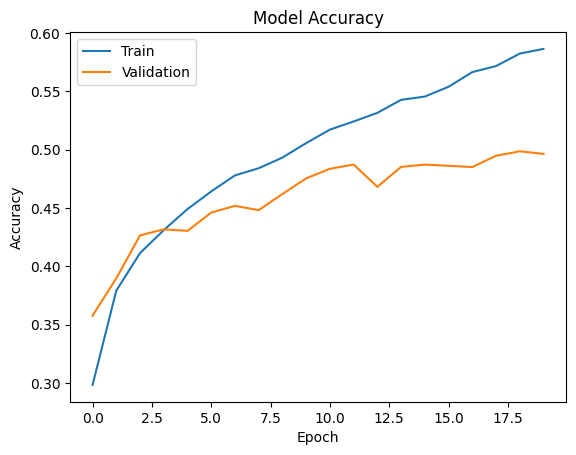

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Here, we are trying to load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Converting labels to  vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN model, Define fully connected neural network model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Printing the model summary
model.summary()

# Training the model with the 70%-30% split for training and validation data
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.3)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#(a)


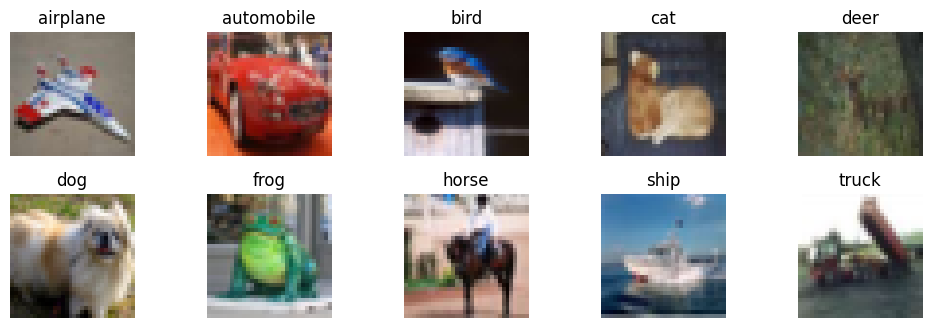

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Loading CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

#The CIFAR-10 class labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting an image from each category
plt.figure(figsize=(10, 5))
for i in range(10):
    # Otaining the second image in the dataset with the current category
    index = np.where(y_train[:, 0] == i)[0][1]
    image = x_train[index]

    # Plot the image
    plt.subplot(3, 5, i+1)
    plt.imshow(image)
    plt.title(cifar10_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


#(b)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create fully connected neural network model
def create_model(optimizer='adam', neurons=512, activation='relu'):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input images
    model.add(Dense(neurons, activation=activation))     # Fully connected layer with specified neurons and activation
    model.add(Dense(10, activation='softmax'))   # Output layer with 10 neurons (for 10 classes) and softmax activation
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Split training data into training and validation sets (70% - 30%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Define custom scoring function
def custom_scorer(model, x, y):
    _, accuracy = model.evaluate(x, y, verbose=0)
    return accuracy

# Define parameter grid for grid search
param_grid = {
    'optimizer': ['adam', 'sgd'],             # Optimizer choices
    'neurons': [256, 512, 1024],              # Number of neurons in hidden layer
    'activation': ['relu', 'tanh']            # Activation function choices
}

# Perform grid search
grid = GridSearchCV(estimator=create_model(), param_grid=param_grid, cv=3, scoring=custom_scorer, verbose=2)
grid_result = grid.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .......activation=relu, neurons=256, optimizer=adam; total time= 1.7min
[CV] END .......activation=relu, neurons=256, optimizer=adam; total time= 1.6min
[CV] END .......activation=relu, neurons=256, optimizer=adam; total time= 1.7min
[CV] END ........activation=relu, neurons=256, optimizer=sgd; total time=  51.1s
[CV] END ........activation=relu, neurons=256, optimizer=sgd; total time=  51.6s
[CV] END ........activation=relu, neurons=256, optimizer=sgd; total time= 1.3min
[CV] END .......activation=relu, neurons=512, optimizer=adam; total time= 3.1min
[CV] END .......activation=relu, neurons=512, optimizer=adam; total time= 3.1min
[CV] END .......activation=relu, neurons=512, optimizer=adam; total time= 3.3min
[CV] END ........activation=relu, neurons=512, optimizer=sgd; total time= 1.6min
[CV] END ........activation=relu, neurons=512, optimizer=sgd; total time= 1.6min
[CV] END ........activation=relu, neurons=512, optimizer=sgd; total time= 1.6min
[CV] END ......activation=re

#From the code, we can see that the best hyperparameters are activation:"relu" , 512 neurons and optimizer: "adam"

#(c)
Using the best hyperparameters of the tuned network to calculate and plot the validation and training losses

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.2522 - loss: 2.3103 - val_accuracy: 0.3519 - val_loss: 1.8138
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.3670 - loss: 1.7772 - val_accuracy: 0.3814 - val_loss: 1.7393
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.3980 - loss: 1.6936 - val_accuracy: 0.4113 - val_loss: 1.6551
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4171 - loss: 1.6371 - val_accuracy: 0.4167 - val_loss: 1.6290
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.4291 - loss: 1.6059 - val_accuracy: 0.4121 - val_loss: 1.6349
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.4366 - loss: 1.5747 - val_accuracy: 0.4305 - val_loss: 1.5879
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4453 - loss: 1.5409 - val_accuracy: 0.4575 - val_loss: 1.5409
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.4604 - loss: 1.5139 - 

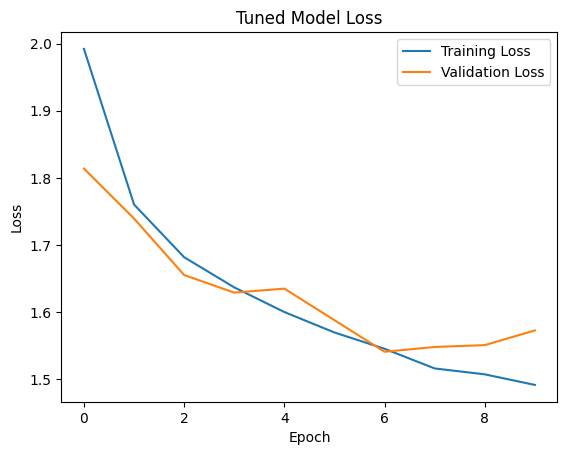

In [ ]:
import matplotlib.pyplot as plt

# Function to create the tuned model
def create_tuned_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input images
    model.add(Dense(512, activation='relu'))    # Fully connected layer with 512 neurons and relu activation
    model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the tuned model
tuned_model = create_tuned_model()

# Train the tuned model
history_tuned = tuned_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=1)

# Plot the training and validation losses
plt.plot(history_tuned.history['loss'], label='Training Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Tuned Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


##(d)
The training and validation accuracies

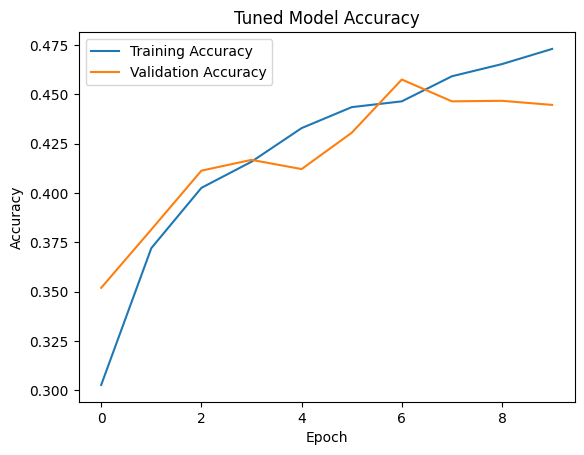

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracies
plt.plot(history_tuned.history['accuracy'], label='Training Accuracy')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tuned Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
